<a href="https://colab.research.google.com/github/Isenlith/ProcImag/blob/teste/Erode_Dilate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teste

In [0]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

##Uso de any() e all()

In [0]:
x = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
y = [[1, 1, 1], [2, 1, 1], [1, 1, 1]]
verif = [False]*3 #inicializando verificador de linhas


## varrendo x e y
for i in range(x.shape[0]):
  verif[i] = all( x[i][j] == y[i][j] for j in range(x.shape[0])) # retorna true se a condição do loop for true durante todo loop
  
if all(verif[n] == True for n in range(x.shape[0]) ):
  print('Todos são iguais')
else:
  print('Algum valor não é igual')

Algum valor não é igual


In [0]:
x = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
y = [[3, 3, 3], [2, 5, 2], [3, 2, 2]]
verif = [False]*3

for i in range(x.shape[0]):
  verif[i] = any( x[i][j] == y[i][j] for j in range(x.shape[0])) # retorna true se pelo menos uma vez a condição dentro do loop for true
  
if any(verif[n] == True for n in range(x.shape[0]) ):
  print('Algum valor é igual')
else:
  print('Nenhum deles é igual')

Nenhum deles é igual


In [0]:
x = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
y = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

print('Caso 1')
print(x.all() == y.all()) # retorna true, desde que ambas matrizes possuam algum valor atribuido, qualquer que seja

x = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
y = np.array([[1, 1, 1], [0, 1, 1], [1, 1, 1]])

print('\n Caso 2')
print(x.all() == y.all()) # se apenas um dos valores entre eles for zero, retornará false

Caso 1
True

 Caso 2
False


##Minhas funções de dilatação e erosão que não funcionam mas fazem sentido

In [0]:
def dilate(image, kernel):
  altura, largura = image.shape
  image_dilation = np.zeros((altura,largura))
  n = kernel.shape[0]
  borda = (n-1)//2
  verif = [False]*n

  for x in range(borda, altura-borda):
    for y in range(borda, largura-borda):
      janela = image[x-borda:x+borda+1,y-borda:y+borda+1]
      
      for i in range(n-1):
        verif[i] = any( kernel[i][j] == janela[i][j] for j in range(n - 1))
  
      if any(verif[m] == True for m in range(n - 1) ):
        image_dilation[x,y] = 255 # 255 porque a binarização do cv2 faz os valores ficarem com 0 e 255
      else:
        image_dilation[x,y] = 0       
  
  return image_dilation

def erode(image, kernel):
  altura, largura = image.shape
  image_erode = np.zeros((altura,largura))
  n = kernel.shape[0]
  borda = (n-1)//2
  verif = [False]*n

  for x in range(borda, altura-borda):
    for y in range(borda, largura-borda):
      janela = image[x-borda:x+borda+1,y-borda:y+borda+1]
    
      for i in range(n-1):
        verif[i] = all( kernel[i][j] == janela[i][j] for j in range(n-1))
  
      if all(verif[m] == True for m in range(n-1) ):
        image_erode[x,y] = 255 # 255 porque a binarização do cv2 faz os valores ficarem com 0 e 255
      else:
        image_erode[x,y] = 0   
  
  return image_erode

##Minha funções de dilatação e erosão que funcionam

In [0]:
def dilate(image, kernel):
  altura, largura = image.shape
  image_dilation = np.zeros((altura,largura))
  n = kernel.shape[0]
  borda = (n-1)//2

  for x in range(borda, altura-borda):
    for y in range(borda, largura-borda):
      janela = image[x-borda:x+borda+1,y-borda:y+borda+1]
      
      if kernel.any() == janela.any():
        image_dilation[x,y] = 255 # 255 porque a binarização do cv2 faz os valores ficarem com 0 e 255
      else:
        image_dilation[x,y] = 0      
  
  return image_dilation

def erode(image, kernel):
  altura, largura = image.shape
  image_erode = np.zeros((altura,largura))
  n = kernel.shape[0]
  borda = (n-1)//2

  for x in range(borda, altura-borda):
    for y in range(borda, largura-borda):
      janela = image[x-borda:x+borda+1,y-borda:y+borda+1]
    
      if kernel.all() == janela.all():
        image_erode[x,y] = 255 # 255 porque a binarização do cv2 faz os valores ficarem com 0 e 255
      else:
        image_erode[x,y] = 0   
  
  return image_erode

##Os códigos rodados abaixo usaram as funções que funcionam

É importante que após processo de erosão ou dilatação, você garanta que suas funções são do tipo uint8 (elas geralmente saem como float64, que é inadequado)

Muitas das imagens aqui já são binarizadas (0 e 255), mas é bom binarizar sempre para garantir né!

Note que a nossa função estará sujeita ao problema com a borda a depender do tamanho do kernel

##Remoção de componentes

Erosão com 13 -> Dilatação com 13

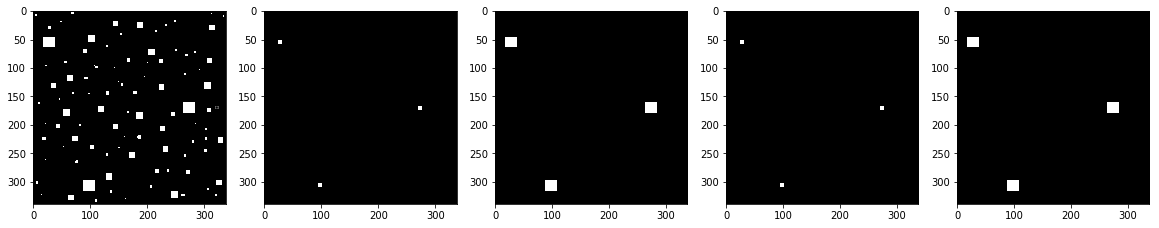

In [0]:
plt.rcParams["figure.figsize"] = [20, 20]

f1 = cv2.imread('FigP0918.png', cv2.IMREAD_GRAYSCALE)
k = cv2.getStructuringElement(cv2.MORPH_RECT,(13,13))

plt.subplot(1,5,1)
plt.imshow(f1, cmap='gray')

# Método de binarização
ret,f1_1 = cv2.threshold(f1,127,255,cv2.THRESH_BINARY)

f1_1 = erode(f1_1, k).astype(np.uint8)

plt.subplot(1,5,2)
plt.imshow(f1_1, cmap='gray')

f1_1 = dilate(f1_1,k).astype(np.uint8)

plt.subplot(1,5,3)
plt.imshow(f1_1, cmap='gray')

plt.subplot(1,5,4)
plt.imshow(cv2.erode(f1,k), cmap='gray')
plt.subplot(1,5,5)
plt.imshow(cv2.dilate(cv2.erode(f1,k), k), cmap='gray')

**************************************************************
1 - Erosão com Elemento Estruturante sendo um disco de raio 10

2 - Erosão com Elemento Estruturante sendo um disco de raio 5

3 - Erosão com Elemento Estruturante sendo um disco de raio 20

Obs: Talvez mudar para imagem png possa causar diferenças entre os resultados aqui e os resultados do livro.

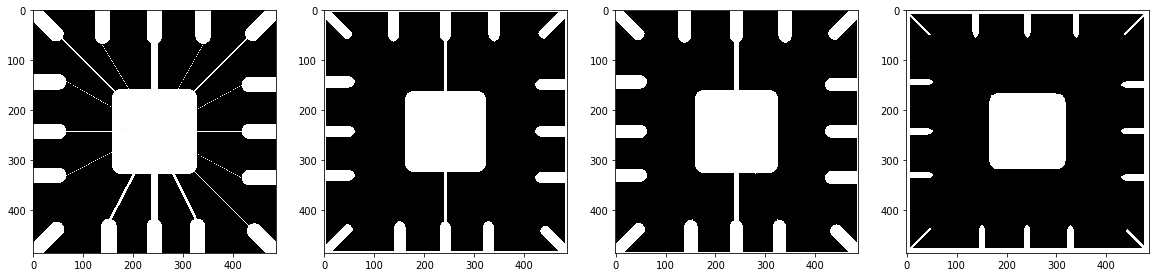

In [0]:
plt.rcParams["figure.figsize"] = [20, 20]

f2 = cv2.imread('Fig0905(a)(wirebond-mask).png', cv2.IMREAD_GRAYSCALE)

plt.subplot(1,4,1)
plt.imshow(f2, cmap='gray')

# Caso 1
# Método de binarização
ret,f2_1 = cv2.threshold(f2,127,255,cv2.THRESH_BINARY) # usei binary_inv porque o sinal máximo aqui é 0, não 255

k = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
f2_1 = erode(f2_1, k).astype(np.uint8)
ret,f2_1 = cv2.threshold(f2_1,127,255,cv2.THRESH_BINARY_INV)

plt.subplot(1,4,2)
plt.imshow(f2_1, cmap='gray')

# Caso 2
# Método de binarização
ret,f2_2 = cv2.threshold(f2,127,255,cv2.THRESH_BINARY)

k = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
f2_2 = erode(f2_2, k).astype(np.uint8)
ret,f2_2 = cv2.threshold(f2_2,127,255,cv2.THRESH_BINARY_INV)


plt.subplot(1,4,3)
plt.imshow(f2_2, cmap='gray')

# Caso 3
# Método de binarização
ret,f2_3 = cv2.threshold(f2,127,255,cv2.THRESH_BINARY)

k = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))
f2_3 = erode(f2_3, k).astype(np.uint8)
ret,f2_3 = cv2.threshold(f2_3,127,255,cv2.THRESH_BINARY_INV)

plt.subplot(1,4,4)
plt.imshow(f2_3, cmap='gray')

##Gradiente Morfológico

Utilizou-se o cv2 pois não sabemos ainda como retornar uma imagem binarizada para o normal.

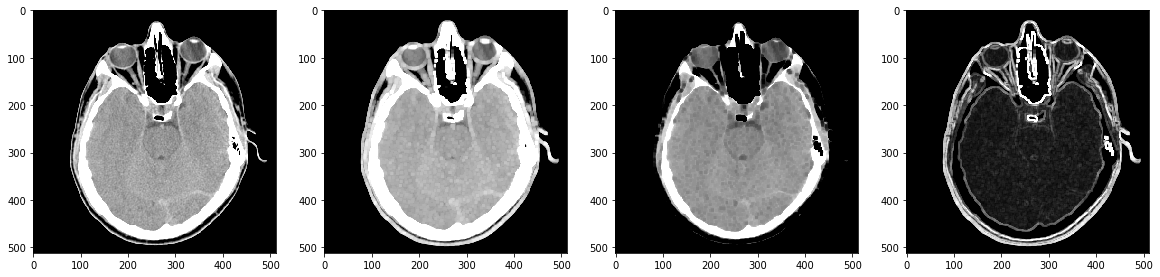

In [0]:
plt.rcParams["figure.figsize"] = [20, 20]

f3 = cv2.imread('Fig0939(a)(headCT-Vandy).tif', cv2.IMREAD_GRAYSCALE)
plt.subplot(1,4,1)
plt.imshow(f3, cmap='gray')

# Dilatação
k = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
f3_1 = cv2.dilate(f3, k)

plt.subplot(1,4,2)
plt.imshow(f3_1, cmap='gray')

# Erosão
k = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5) )
f3_2 = cv2.erode(f3, k)

plt.subplot(1,4,3)
plt.imshow(f3_2, cmap='gray')

# Gradiente Morfológico
f3_3 = cv2.addWeighted(f3_1, 1, f3_2, -1, 0) # É util o blending do cv2, pois impede saturação

plt.subplot(1,4,4)
plt.imshow(f3_3, cmap='gray')

##Extração de Fronteiras

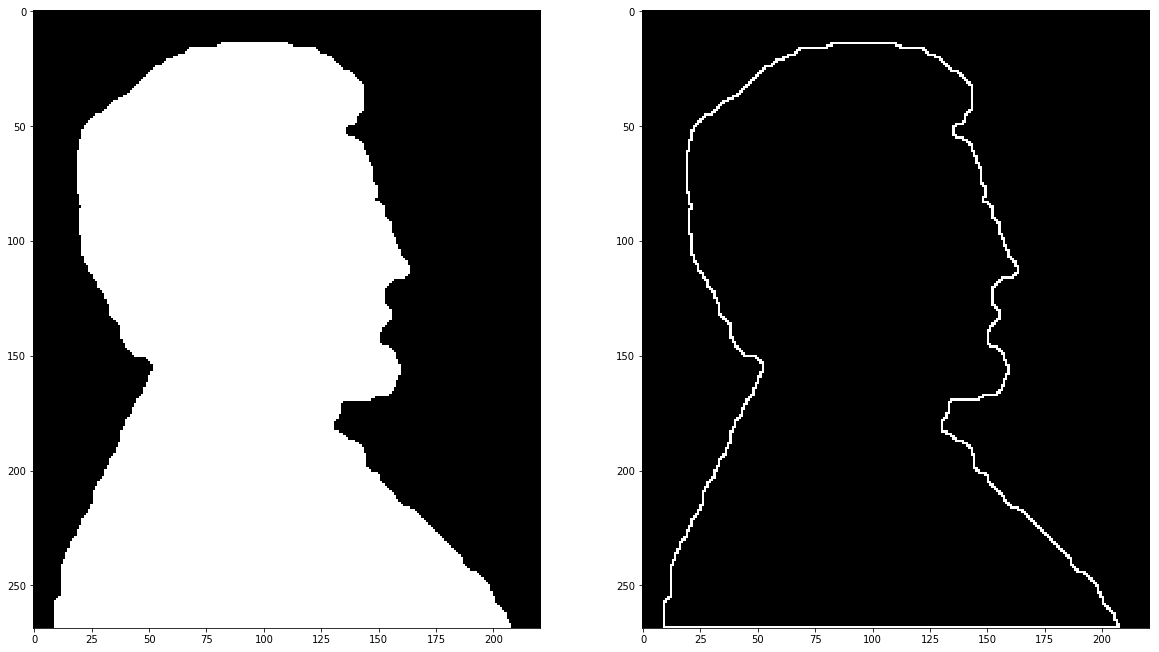

In [0]:
plt.rcParams["figure.figsize"] = [20, 20]

f4 = cv2.imread('Fig0914(a)(licoln from penny).png', cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.imshow(f4, cmap='gray')

ret, f4 = cv2.threshold(f4,127,255,cv2.THRESH_BINARY)
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
f4_1 = cv2.addWeighted(f4, 1, erode(f4,k).astype(np.uint8), -1, 0)

plt.subplot(1,2,2)
plt.imshow(f4_1, cmap='gray')

##Remoção de Ruído

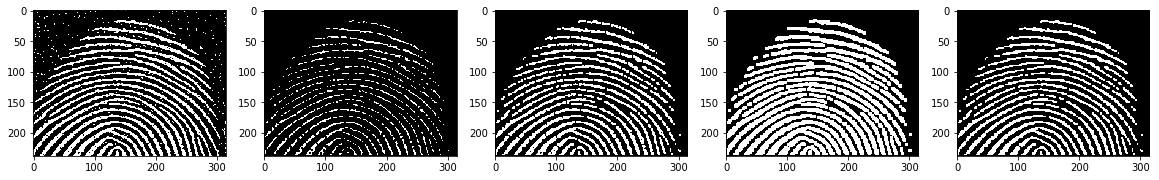

In [0]:
plt.rcParams["figure.figsize"] = [20, 20]

f5 = cv2.imread('Fig0911(a)(noisy_fingerprint).png', cv2.IMREAD_GRAYSCALE)
plt.subplot(1,5,1)
plt.imshow(f5, cmap='gray')

# Erosão
ret,f5_1 = cv2.threshold(f5, 127, 255, cv2.THRESH_BINARY)
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
f5_1 = erode(f5_1, k).astype(np.uint8)

plt.subplot(1,5,2)
plt.imshow(f5_1, cmap='gray')

# Abertura
ret,f5_2 = cv2.threshold(f5_1, 127, 255, cv2.THRESH_BINARY)
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
f5_2 = dilate(f5_1, k).astype(np.uint8)

plt.subplot(1,5,3)
plt.imshow(f5_2, cmap='gray')

# Dilatação da Abertura
ret,f5_3 = cv2.threshold(f5_2, 127, 255, cv2.THRESH_BINARY)
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
f5_3 = dilate(f5_2, k).astype(np.uint8)

plt.subplot(1,5,4)
plt.imshow(f5_3, cmap='gray')

# Fechamento da abertura
ret,f5_4 = cv2.threshold(f5_3, 127, 255, cv2.THRESH_BINARY)
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
f5_4 = erode(f5_3, k).astype(np.uint8)

plt.subplot(1,5,5)
plt.imshow(f5_4, cmap='gray')

##Extração de fronteiras

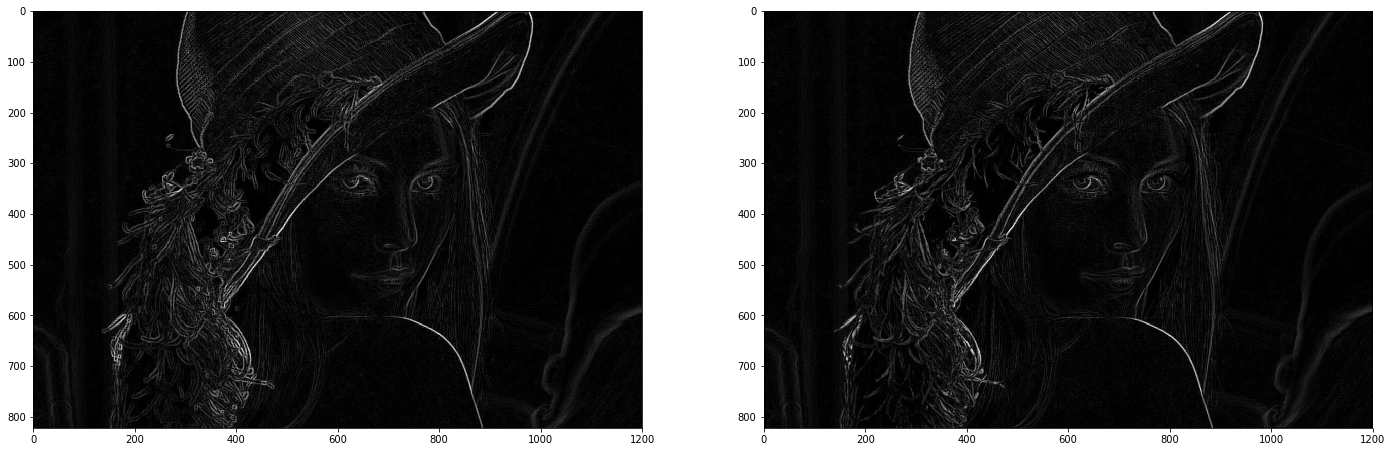

In [0]:
plt.rcParams["figure.figsize"] = [24, 12]

f6 = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)


k = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
f6_1 = cv2.addWeighted(cv2.dilate(f6,k), 1, f6, -1, 0)

plt.subplot(1,2,1)
plt.imshow(f6_1, cmap='gray')

# Extração de fronteiras
k = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
f6_2 = cv2.addWeighted(f6, 1, cv2.erode(f6,k), -1, 0)

plt.subplot(1,2,2)
plt.imshow(f6_2, cmap='gray')